In [1]:
import pandas as pd
import os

print("Current Folder:", os.getcwd())
print("Files here:", os.listdir())


Current Folder: c:\Users\HP\OneDrive\Desktop\retail_sales_capstone
Files here: ['1_data_cleaning.ipynb', 'data']


In [2]:
import pandas as pd

df = pd.read_csv("data/raw_data.csv")

print("Shape:", df.shape)
df.head()

Shape: (100, 7)


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [3]:
import numpy as np

# Repeat dataset 10 times
df_large = pd.concat([df]*10, ignore_index=True)

# Add slight variation to Quantity and Price
df_large['Quantity'] = df_large['Quantity'] + np.random.randint(-2, 3, size=len(df_large))
df_large['Price'] = df_large['Price'] + np.random.randint(-1000, 1000, size=len(df_large))

# Recalculate Total Sales
df_large['Total_Sales'] = df_large['Quantity'] * df_large['Price']

print("New Shape:", df_large.shape)
df_large.head()


New Shape: (1000, 7)


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,9,37697,CUST001,East,339273
1,2024-01-02,Headphones,5,16144,CUST002,North,80720
2,2024-01-03,Phone,3,21652,CUST003,West,64956
3,2024-01-04,Headphones,1,30739,CUST004,East,30739
4,2024-01-05,Laptop,8,39705,CUST005,North,317640


In [4]:
df_large['Date'] = pd.to_datetime(df_large['Date'])


In [5]:
print(df_large.isnull().sum())


Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64


In [6]:
df_large = df_large.drop_duplicates()
print("After removing duplicates:", df_large.shape)


After removing duplicates: (1000, 7)


In [7]:
df_large = df_large.drop_duplicates()
print("After removing duplicates:", df_large.shape)


After removing duplicates: (1000, 7)


In [8]:
df_large.to_csv("data/cleaned_data.csv", index=False)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/cleaned_data.csv")


In [11]:
df_large['Date'] = pd.to_datetime(df_large['Date'])
df_large['Month'] = df_large['Date'].dt.month
df_large['Profit'] = df_large['Total_Sales'] * 0.2


In [12]:
df_large.to_csv("data/cleaned_data.csv", index=False)


In [13]:
df = pd.read_csv("data/cleaned_data.csv")

print(df.columns)


Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales', 'Month', 'Profit'],
      dtype='object')


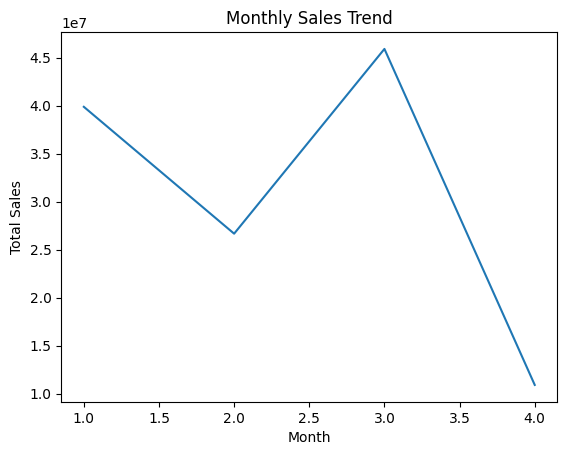

In [14]:
monthly_sales = df.groupby('Month')['Total_Sales'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


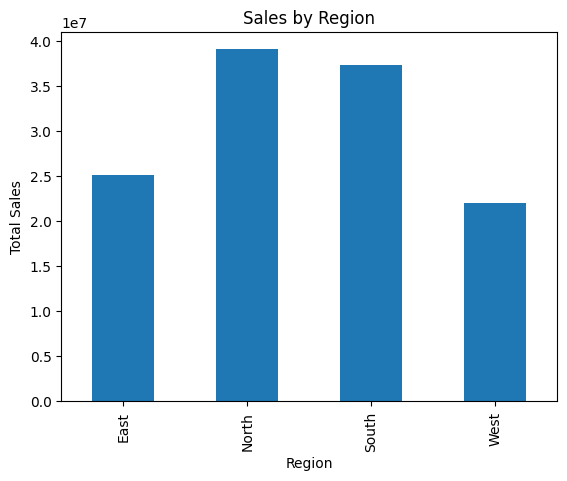

In [15]:
region_sales = df.groupby('Region')['Total_Sales'].sum()

plt.figure()
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


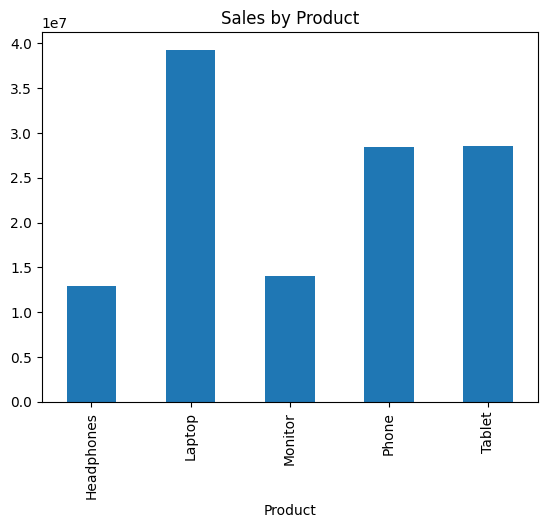

In [16]:
product_sales = df.groupby('Product')['Total_Sales'].sum()

plt.figure()
product_sales.plot(kind='bar')
plt.title("Sales by Product")
plt.show()


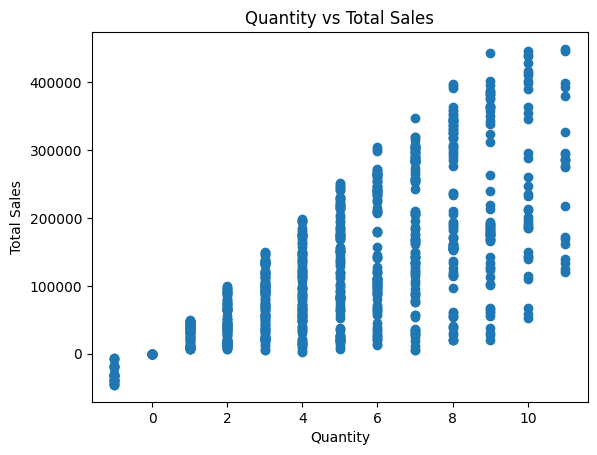

In [17]:
plt.figure()
plt.scatter(df['Quantity'], df['Total_Sales'])
plt.title("Quantity vs Total Sales")
plt.xlabel("Quantity")
plt.ylabel("Total Sales")
plt.show()


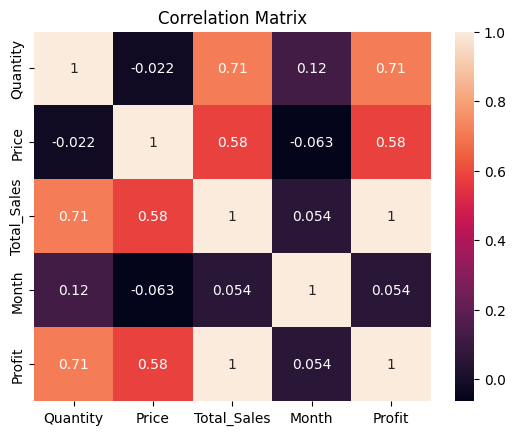

In [18]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()
